\newpage

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## 1. Classification Problem Identification: Define and describe a classification problem based on the dataset

In [2]:
chronic_kidney_disease = fetch_ucirepo(id=336)

X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

In [3]:
X, y

(      age    bp     sg   al   su     rbc        pc         pcc          ba  \
 0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
 1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
 2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
 3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
 4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
 ..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
 395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
 396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
 397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
 398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
 399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
 
        bgr  ...  hemo   pcv    wbcc  rbcc  htn   

For the question1 , based on medical data, we will predict whether an individual will develop chronic kidney disease (CKD). This prediction is a binary classification problem, and the target variable "category" includes two categories: "ckd" means suffering from kidney disease, and "notckd" means not suffering from kidney disease.


## 2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

In [4]:
binary_mappings = {
    'normal': 0, 'abnormal': 1,
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'good': 0, 'poor': 1
}

binary_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for column in binary_columns:
    if column in X.columns:
        specific_mapping = {key: binary_mappings[key] for key in binary_mappings if key in X[column].unique()}
        X[column] = X[column].map(specific_mapping)
class_mapping = {'ckd': 1, 'notckd': 0}
y['class'] = y['class'].str.strip()

y['class'] = y['class'].map(class_mapping)

In [5]:
X, y

(      age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...  hemo   pcv  \
 0    48.0  80.0  1.020  1.0  0.0  NaN  0.0  0.0  0.0  121.0  ...  15.4  44.0   
 1     7.0  50.0  1.020  4.0  0.0  NaN  0.0  0.0  0.0    NaN  ...  11.3  38.0   
 2    62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  ...   9.6  31.0   
 3    48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  ...  11.2  32.0   
 4    51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...  11.6  35.0   
 ..    ...   ...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...   ...   
 395  55.0  80.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  140.0  ...  15.7  47.0   
 396  42.0  70.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0   75.0  ...  16.5  54.0   
 397  12.0  80.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  100.0  ...  15.8  49.0   
 398  17.0  60.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  114.0  ...  14.2  51.0   
 399  58.0  80.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  131.0  ...  15.8  53.0   
 
        wbcc  rbcc  htn   

For the question2, we observed that our dataset contains several binary classification features, including "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe" and "ane". These features are initially encoded with string labels such as "normal", "abnormal", "present", "absent", "yes", "no", "good" and "poor". To convert these features into a format that our machine learning model can more easily interpret, we map these string labels to binary numeric values. For example, we map "normal" and "good" to 0, and "abnormal" and "poor" to 1.
The mapping process is implemented using the “map()” function in pandas DataFrame. We first define a dictionary to specify mapping rules and then apply these rules to each binary column in the feature set.
In addition to the binary features, our target variable "class" also needs to be transformed. The "class" variable initially contains the string labels "ckd" and "notckd" indicating whether the patient has chronic kidney disease. We map "ckd" to 1 and "notckd" to 0, converting the target variable into a binary number format suitable for binary classification tasks.


## 3. Dataset Overview: Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [6]:
print("Data types:\n", X.dtypes)

print("\nStatistical summary:\n", X.describe())

print("\nNumber of observations:\n", X.count())

print("\nDistribution of the target variable:\n", y.value_counts())

Data types:
 age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
dtype: object

Statistical summary:
               age          bp          sg          al          su         rbc  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  248.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142    0.189516   
std     17.169714   13.683637    0.005717    1.352679    1.099191    0.392711   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000    0.000000   
50%     55.000000   80.000000    1.020000    0.000000   

For the question3, After face-changing transformation of the data, our data set covers 24 features, all of which are continuous or binary numerical types, accompanied by a binary target variable. These characteristics include demographic, biological and medical indicators such as patient age, blood pressure, red blood cell count and hypertension status.
We observe that the number of observations in the dataset varies between 248 and 399. This revealed the presence of missing data. Therefore, in the data preprocessing stage, we need to properly handle these missing data.

By reviewing the statistical overview of the data set, we find that the feature values have a wide distribution range. For example, "age" ranges from 2 to 90 years old, while "bp(blood pressure)" fluctuates between 50 and 180. This variability highlights the importance of feature scaling, which needs to be considered during data preprocessing to prevent individual features from becoming overwhelmingly dominant in model training.
The target variable "class" is a binary variable that indicates whether the patient has chronic kidney disease (CKD). Based on the distribution of the target variable, we observed 250 CKD cases and 150 non-CKD cases. This imbalance in class distribution can have an impact on the performance of machine learning models, potentially causing the model to be biased towards predicting the majority class. To alleviate this imbalance during training, we may need to employ techniques such as class weighting or oversampling.


## 4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

            age        bp        sg        al        su       rbc        pc  \
age    1.000000  0.159480 -0.191096  0.122091  0.220866  0.079987  0.150867   
bp     0.159480  1.000000 -0.218836  0.160689  0.222576  0.294129  0.189310   
sg    -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.395774 -0.374407   
al     0.122091  0.160689 -0.469760  1.000000  0.269305  0.437873  0.558535   
su     0.220866  0.222576 -0.296234  0.269305  1.000000  0.164609  0.202815   
rbc    0.079987  0.294129 -0.395774  0.437873  0.164609  1.000000  0.426395   
pc     0.150867  0.189310 -0.374407  0.558535  0.202815  0.426395  1.000000   
pcc    0.157693  0.057891 -0.291618  0.401284  0.151222  0.110282  0.514578   
ba     0.042160  0.111204 -0.220656  0.368373  0.107047  0.180657  0.329655   
bgr    0.244992  0.160193 -0.374710  0.379464  0.717827  0.293097  0.329612   
bu     0.196985  0.188517 -0.314295  0.453528  0.168583  0.288021  0.435700   
sc     0.132531  0.146222 -0.361473  0.399198  0.223

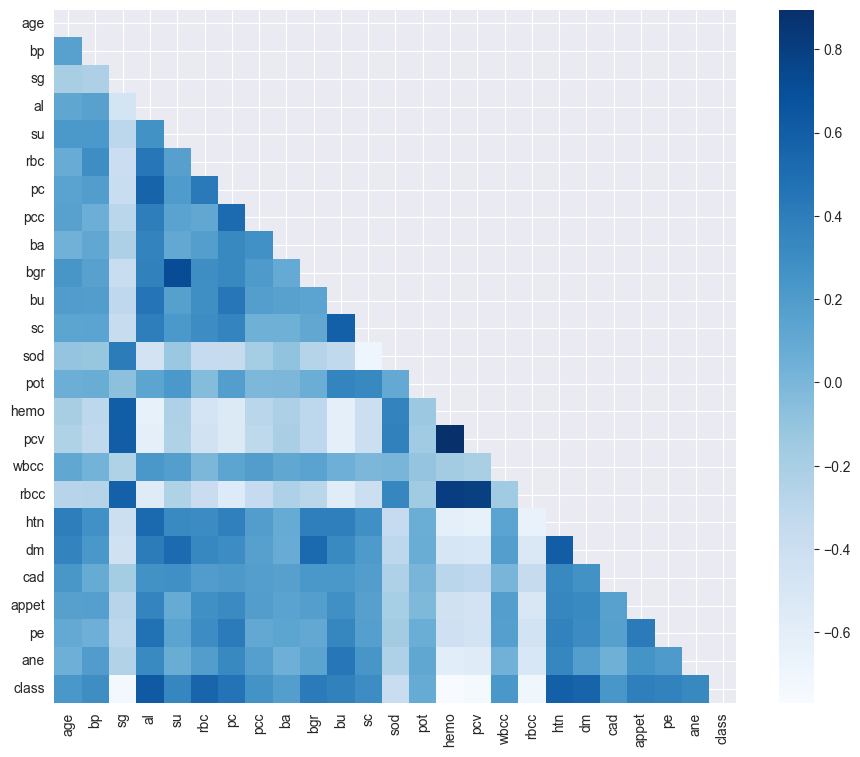

In [7]:
df = pd.concat([X, y.rename(columns={y.columns[0]: 'class'})], axis=1)

corr = df.corr()
print(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr,cmap='Blues',mask=mask)
plt.show()

For the question 4, In our analysis, we explored the relationships between variables by computing a correlation matrix of the dataset and visualizing it using a heat map. This step has important guiding significance for our feature selection or extraction process.
From the results of the correlation matrix, we clearly observe that there is a significant negative correlation between "sg" (proportion) and the target variable "class", with a correlation coefficient of -0.732163. This finding suggests that as the specific gravity of a patient's urine increases, their probability of developing chronic kidney disease actually decreases. Therefore, "sg" is undoubtedly a key feature in our classification task.
At the same time, we also noticed that there is a strong positive correlation between "al" (albumin) and the target variable, with a correlation coefficient of 0.627090, which means that patients with high albumin levels are more likely to suffer from chronic kidney disease. On the contrary, "hemo" (hemoglobin) showed a strong negative correlation with the target variable, with a correlation coefficient of -0.768919, indicating that patients with higher albumin levels are associated with a lower incidence of chronic kidney disease. The close relationship between these two features and the target variable makes them important in predictive modeling.
It is worth mentioning that the correlation coefficient between "su" (sugar) and "bgr" (random blood sugar) is as high as 0.717827, showing a strong positive correlation, which is an example of the high correlation between features in the data set. This high correlation may cause multicollinearity problems, which may increase the variance of the model's estimated coefficients and make the model more sensitive to small changes in the data. To deal with this problem, we may consider eliminating one of the features during feature extraction, or merging the two into a new feature.


## 5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [8]:
missing_percentages = (X.isnull().sum() / len(X)) * 100
print(missing_percentages)

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wbcc     26.50
rbcc     32.75
htn       0.50
dm        0.75
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64


In [9]:
low_missing_cols = ['age', 'bp', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
moderate_missing_cols = ['sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo', 'pcv']
high_missing_cols = ['rbc', 'pc', 'sod', 'pot', 'wbcc', 'rbcc']

simple_imputer = SimpleImputer(strategy='median')  # or use 'most_frequent' for categorical data
X[low_missing_cols] = simple_imputer.fit_transform(X[low_missing_cols])

knn_imputer = KNNImputer(n_neighbors=5)  # Can be adjusted based on data
X[moderate_missing_cols + high_missing_cols] = knn_imputer.fit_transform(X[moderate_missing_cols + high_missing_cols])

In [10]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.2,0.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.20,1.0,1.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.2,0.0,0.0,0.0,179.8,...,11.3,38.0,6000.0,5.08,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,3.80,0.0,1.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.90,1.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.60,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.90,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.20,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.40,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,14.2,51.0,7200.0,5.90,0.0,0.0,0.0,0.0,0.0,0.0


For the question 5,Our dataset contains features with multiple missing values, which must be properly handled before continuing with model training. To do this, we first counted the percentage of missing values in each feature to get a complete picture of missing data. Statistical results show that the proportion of missing values ranges from 0.25% to 38%, revealing differences in the degree of missing data for different features.
Based on the percentage of missing values, we classify features into three categories: low missingness (less than 5%), moderate missingness (5-20%), and high missingness (more than 20%). Among them, the "low missingness" category covers features such as "age", "bp", and "pcc", while the "moderate missingness" category includes features such as "sg", "al", and "su". As for the "high missingness" category, it involves features such as "rbc", "pc", and "sod".
For "low missingness" features, we used a simple imputation method, which uses the median of the corresponding feature to fill in missing values. This method is robust and can effectively resist the influence of outliers because the median is not disturbed by extreme values.
However, when dealing with "moderately missing" and "highly missing" features, direct use of median or mean for imputation may introduce larger biases due to the higher proportion of missing data. Therefore, we chose the K-nearest neighbor (KNN) interpolation method, which imputes and replaces missing values based on the values of the nearest neighbors. This method is more complex and can capture deep relationships in the data, making it ideal for situations with high levels of missingness.
In summary, our missing value handling strategy involves assessing missingness in the dataset and employing appropriate imputation methods based on the proportion of missing data. Through this strategy, we were able to retain valuable information across all features while minimizing possible bias from missing data.


## 6.Outlier Analysis: Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

In [11]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

for col in X.columns:
    median = X[col].median()
    X.loc[outlier_mask[col], col] = median

In [12]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.2,0.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.20,1.0,1.0,0.0,0.0,0.0,0.0
1,55.0,80.0,1.020,4.0,0.0,0.2,0.0,0.0,0.0,179.8,...,11.3,38.0,6000.0,5.08,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,124.0,...,9.6,31.0,7500.0,3.80,0.0,1.0,0.0,0.0,0.0,0.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,0.0,117.0,...,11.2,32.0,6700.0,3.90,1.0,0.0,0.0,0.0,0.0,0.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.60,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.90,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.20,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.40,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,14.2,51.0,7200.0,5.90,0.0,0.0,0.0,0.0,0.0,0.0


For the question 6,Similar to many real-world data sets, our data set may also contain outliers, values ​​that differ significantly from other observations. These outliers have the potential to distort statistics and affect how well the model learns from the data. Therefore, identifying and handling these outliers has become a crucial step in our data preprocessing process.
In order to effectively detect outliers, we adopt the interquartile range (IQR) method. The IQR is obtained by calculating the difference between the first quartile (i.e. the 25th percentile) and the third quartile (i.e. the 75th percentile) of the data. According to the definition of IQR, any data point that is less than the first quartile minus 1.5 times the IQR or greater than the third quartile plus 1.5 times the IQR is determined to be an outlier by us.
After identifying these outliers, we chose to replace them using the median of the corresponding feature. We choose the median rather than the mean as a replacement value mainly because the median is a more robust statistic that is less susceptible to extreme values. In this way, we successfully reduce the impact of outliers on the dataset while also preserving the value of the data.


## 7.Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

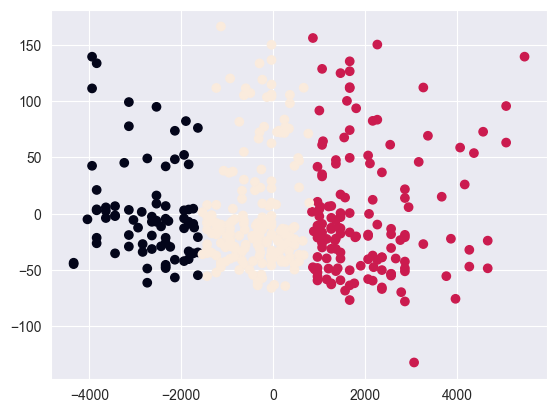

In [13]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca['cluster'] = labels

plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_pca['cluster'])
plt.show()

For the question 7,To identify potential subgroups in the data, we used K-means clustering, an unsupervised machine learning algorithm. In this study, we set three cluster centers (n_clusters=3), which can be flexibly adjusted according to the specific characteristics of the data set and domain knowledge.
However, visualizing high-dimensional data often faces challenges. To solve this problem, we introduced the dimensionality reduction technique of principal component analysis (PCA). PCA can transform high-dimensional data into two-dimensional space while retaining the variance information of the data to the greatest extent. This transformation allows us to clearly visualize the clusters on a 2D scatterplot.
In the scatterplot, different patient clusters are distinguished by different colors.


## 8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

For the question 8,We used the "train_test_split" function in the sklearn library to split the data set into two parts after random shuffling. Among them, 70% of the data is designated as the training set (by setting test_size=0.3, it means that 30% of the data is used as the test set, and the remaining part is automatically allocated as the training set). The training set is used for model fitting, while the test set serves as unknown data to evaluate the performance and generalization ability of the model.
To ensure the repeatability of the experiment, we set the "random_state" parameter to 1 so that the data splitting method remains consistent each time the code is run.


## 9.Classifier Choices: Identify the two classifiers you have chosen and justify your selections.

For the question 9,In our study, we selected support vector machine (SVM) and random forest as the main classifiers based on their respective advantages and applicability.
First, Support Vector Machine (SVM) was selected for its excellent performance in linear and nonlinear classification tasks. SVM is particularly suitable for processing high-dimensional data common in medical data sets. It works by finding a hyperplane that maximizes the separation of different categories, thereby achieving robust classification performance. In addition, as long as the appropriate kernel and regularization parameters are selected, SVM can effectively avoid the problem of overfitting.
Secondly, we chose the ensemble learning method of random forest. It works by building multiple decision trees and outputting the most common categories as prediction results. Random forest is highly robust to outliers and can effectively handle the common data imbalance problem in medical data sets. Furthermore, it provides an effective indicator of feature importance, bringing valuable insights to our research. Random forests are relatively fast to train and require no data scaling, simplifying the preprocessing process.


## 10. Performance Metrics: Outline the two metrics for comparing the performance of the classifiers.

In [15]:
svm = SVC(kernel='rbf', random_state=42, gamma=0.10, C=1.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('SVM accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('SVM F1 score: %.2f' % f1_score(y_test, y_pred))

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('Random Forest accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Random Forest F1 score: %.2f' % f1_score(y_test, y_pred))

SVM accuracy: 0.58
SVM F1 score: 0.74
Random Forest accuracy: 0.99
Random Forest F1 score: 0.99


For the question 10, In our study, to comprehensively evaluate the performance of support vector machine (SVM) and random forest classifiers, we adopted accuracy and F1 score as the main evaluation indicators.

First, accuracy, as the most intuitive performance measure, reflects the proportion of observations correctly predicted by the classifier to the total observations. The effect is particularly significant in symmetric data sets. In our experiments, the SVM model achieved an accuracy of 0.58, while the random forest model achieved an accuracy as high as 0.99. This significant difference shows that the prediction accuracy of the random forest model on the test set is much higher than that of the SVM model.
Secondly, to evaluate the classifier performance more comprehensively, we also use the F1 score, which takes precision and recall into consideration and is especially suitable for cases where the categories are unevenly distributed. The best value of F1 score is 1, indicating perfect precision and recall, while the worst value is 0. Experimental results show that the F1 score of the SVM model is 0.74, and the F1 score of the random forest model is as high as 0.99. This result further confirms the superiority of the random forest model on the test set.


## 11.Feature Selection/Extraction: Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

In [16]:
abs_corr_matrix = corr.abs()

class_corr = abs_corr_matrix['class']

top_n = class_corr.nlargest(10)

top_features = top_n.index[top_n.index != 'class']

print(f"Top correlated features with 'class': {top_features.tolist()}")

Top correlated features with 'class': ['hemo', 'pcv', 'sg', 'rbcc', 'al', 'htn', 'dm', 'rbc', 'pc']


For the question 11, In order to improve the performance of the classifier, we adopt a feature selection method based on the correlation between the features and the target category. Feature selection is crucial in machine learning because it can optimize model performance by reducing the risk of overfitting, improving accuracy, and shortening training time.
In this study, we calculated the absolute value of the Pearson correlation coefficient between each feature and the target category. The Pearson correlation coefficient is a measure of the strength of the linear relationship between two data sets, and its absolute value can reflect the closeness of the relationship regardless of directionality.
After calculation, we selected the top 9 features with the highest correlation coefficients, namely: "hemo", "pcv", "sg", "rbcc", "al", "htn", "dm", "rbc" and "pc". These features have the strongest correlation with the target class and therefore potentially provide the richest information to our classifier.
By focusing on these key features, we can expect to significantly improve classifier performance. By eliminating irrelevant or redundant features, we can reduce the complexity of the model, making it easier to capture underlying patterns in the data.


## 12.Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

In [17]:
X_train_top_features = X_train[top_features].values
X_test_top_features = X_test[top_features].values

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=1.0)
svm.fit(X_train_top_features, y_train)

y_pred_tf = svm.predict(X_test_top_features)

print('SVM with top features accuracy: %.2f' % accuracy_score(y_test, y_pred_tf))
print('SVM with top features F1 score: %.2f' % f1_score(y_test, y_pred_tf))

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train_top_features, y_train)

y_pred = forest.predict(X_test_top_features)

print('Random Forest with top features accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Random Forest with top features F1 score: %.2f' % f1_score(y_test, y_pred))

SVM with top features accuracy: 0.94
SVM with top features F1 score: 0.95
Random Forest with top features accuracy: 0.97
Random Forest with top features F1 score: 0.97


For the question 12, Following the feature selection process described in the previous section, we retrained the support vector machine (SVM) and random forest classifiers using only the top 9 features most relevant to the target category. This is intended to improve classifier performance by simplifying the model and focusing on the most informative features.
The experimental results are impressive, especially for the SVM model. Before feature selection, the accuracy and F1 score of SVM are 0.58 and 0.74 respectively. However, after training on selected features, the performance of the SVM model was significantly improved, with the accuracy and F1 score increasing to 0.94 and 0.95 respectively. This significant improvement fully demonstrates the key role of feature selection in improving the performance of machine learning models. By focusing on the most relevant features, the SVM model can more effectively capture the underlying patterns in the data and make more accurate predictions.
However, the random forest model shows slight performance degradation on selected features. Both its accuracy and F1 score dropped from the original 0.99 to 0.97. This may be due to the fact that for random forests, there are still some useful features that are not selected.


## 13.Interpretable Classifier Insight: After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

In [18]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

names = [df.columns[i] for i in indices]

print("Feature importance:")
for i, name in enumerate(names):
    print(f"{name}: {importances[indices[i]]}")

Feature importance:
sg: 0.2022239549774426
hemo: 0.1382584742628825
pcv: 0.12938866485322748
sc: 0.12565046337896502
rbc: 0.08880880121157245
al: 0.0706009799338478
dm: 0.04717633314577257
htn: 0.04567510029852536
rbcc: 0.03436873139433587
sod: 0.029253256646674473
bgr: 0.02819148961585286
pc: 0.014378682648857216
age: 0.012727633957003685
bu: 0.012059117853320155
pot: 0.007904848132687764
bp: 0.007602899890524739
wbcc: 0.005730567798507575
pe: 0.0
ba: 0.0
pcc: 0.0
su: 0.0
cad: 0.0
appet: 0.0
ane: 0.0


For the question 13, In the final stage of the analysis, we retrained the random forest classifier on the entire dataset and further explored the feature importance revealed by the model. In the random forest model, feature importance reflects the contribution of each feature to reducing the model's prediction error, thereby quantifying the amount of information each feature has in predicting the target category.
After in-depth analysis, we found that features such as "sg" (specific gravity), "hemo" (hemoglobin), "pcv" (packed cell volume), and "sc" (serum creatinine) have significant feature importance in the random forest model . The prominence of these features suggests that they play a key role in improving the predictive power of the model.
Among them, the “sg” feature tops the list with an importance score of 0.202, which means that it provides the richest information in the predictions of our random forest model. Specific gravity, a measure of the concentration of substances in urine, may be affected by multiple factors including kidney function, a finding that reveals the importance of kidney function in our study.
Similarly, “hemo” (hemoglobin) and “pcv” (packed cell volume) also showed their importance with high scores of 0.138 and 0.129 respectively. These two characteristics are closely related to the blood's oxygen-carrying capacity, and changes in the blood's oxygen-carrying capacity can be affected by a variety of health conditions, including kidney disease. This finding further emphasizes the non-negligible relevance of these blood-related features in our dataset.
However, it is worth noting that although feature importance can provide us with a useful perspective on the relationship between features and target categories, it does not show the full picture of these relationships. For example, it cannot reveal the directionality of the relationship (i.e., whether a feature is positively or negatively related to the target category), nor can it reflect the interaction between features.

## 15. Team Contributions:

The specific plans for all of our assignments were discussed together. Qikai Gao is responsible for questions 1-4, Binghe Li is responsible for questions 5-8, and Longzhixin Huang is responsible for questions 9-13.

## 16. Link to the public GitHub repository.

https://github.com/math3da3/reimagined-rotary-phone.git